## Arbitrary Value Imputation

It consist of replacing NAN with arbitrary value

In [1]:
import pandas as pd
df= pd.read_csv('titanic_dataset.csv', usecols=['Age', 'Fare', 'Survived'])
df.tail(3)

,Survived,Age,Fare
888,0,NaN,23.45
889,1,26.0,30.00
890,0,32.0,7.75


In [2]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [3]:
def imputate_nan(df, variable):
    df[variable +"_min"]= df[variable].fillna(0.42) #fill with the Lowest number
    df[variable +"_max"]= df[variable].fillna(80) #Fill with the higest outlier
    
imputate_nan(df, 'Age')
df.tail(3)

,Survived,Age,Fare,Age_min,Age_max
888,0,NaN,23.45,0.42,80.0
889,1,26.0,30.00,26.00,26.0
890,0,32.0,7.75,32.00,32.0


In [4]:
print("Standard Deviation of Age=", df['Age'].std())
print("Standard Deviation of Age_min=", df['Age_min'].std())
print("Standard Deviation of Ag_max=", df['Age_max'].std())



Standard Deviation of Age= 14.526497332334044
Standard Deviation of Age_min= 17.483538436526285
Standard Deviation of Ag_max= 23.9224661195059


##Result above showed that "Age_min"is in better position to be used than "Age_max" due to high differences in the std's.

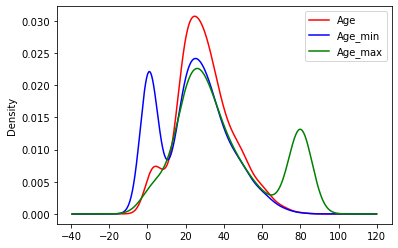

In [5]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='red')  #Kernel density estimators (kde) plot
df['Age_min'].plot(kind='kde', ax=ax, color='blue')
df['Age_max'].plot(kind='kde', ax=ax, color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Advantages

1. Easy to implement
2. Captures the impotance of missingess if there is one

## Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decides which value to use